In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Travel.csv")

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# A. What is the distribution of customerages, and how does age relate to product purchase (ProdTaken)?

In [7]:
df.loc[:,"ProdTaken" : "Age"].head()

,ProdTaken,Age
0,1,41.0
1,0,49.0
2,1,37.0
3,0,33.0
4,0,NaN


In [ ]:
#we have many null values
#let's fix this

In [8]:
df["Age"].fillna(value = df["Age"].mean(), inplace = True)

In [29]:
bins = list(range(18, 62, 5))
labels = ['18-22 years', '23-27 years', '28-32 years', '33-37 years', '38-42 years', '43-47 years', '48-52 years', '53-57 years']


df["ageGrp"] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

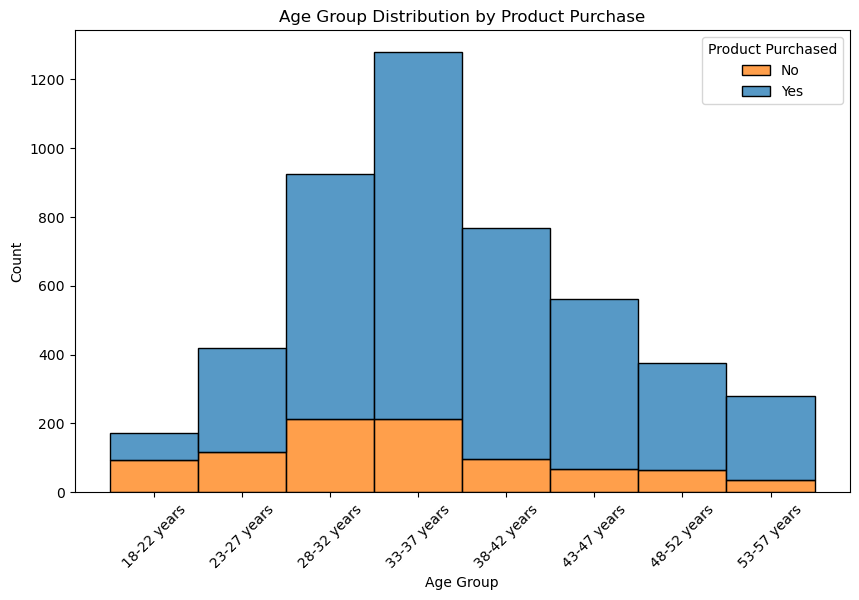

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ageGrp', hue='ProdTaken', multiple='stack')
plt.title('Age Group Distribution by Product Purchase')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

# B. How does the type of contact(type of contact)influence the likelihood of purchasing a travel product?

In [32]:
pd.crosstab(df["ProdTaken"], df["TypeofContact"])

TypeofContact,Company Invited,Self Enquiry
ProdTaken,,
0,1109,2837
1,310,607


In [33]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [34]:
df["TypeofContact"].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

# C. Is there a correlation between the city tier(citytier)and monthly income (monthly income) of customers?

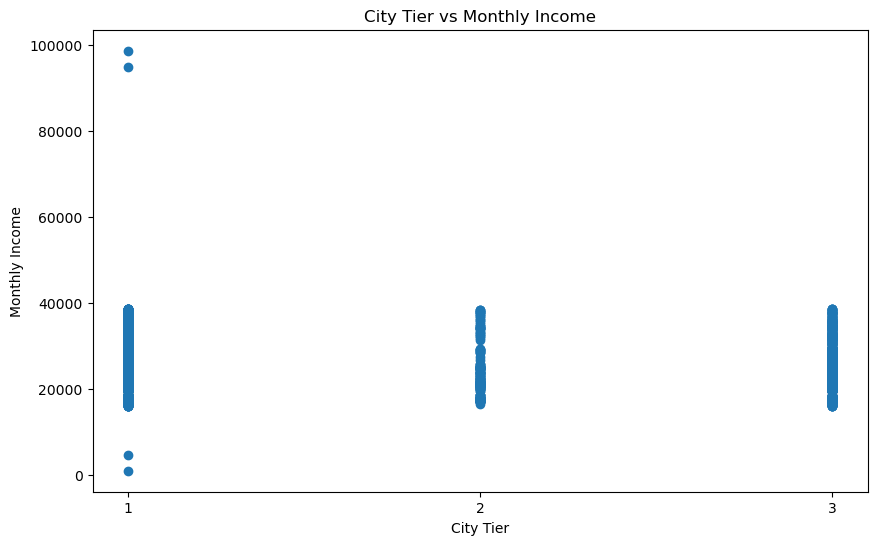

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CityTier'], df['MonthlyIncome'])
plt.title('City Tier vs Monthly Income')
plt.xlabel('City Tier')
plt.ylabel('Monthly Income')
plt.xticks([1, 2, 3])
plt.show()

# D. What is the average duration of a pitch (duration of pitch)for customers who purchased a product versus those who did not?

In [36]:
df3 = df.groupby("ProdTaken")["DurationOfPitch"].mean()
df3.index = ["Product Not Purchased", "Product Purchased"]

In [37]:
df3

Product Not Purchased    15.169325
Product Purchased        16.873143
Name: DurationOfPitch, dtype: float64

# E. How do occupation types(occupation)distribute among customers,and is there an occupation type that is more likely to purchase a travel product?

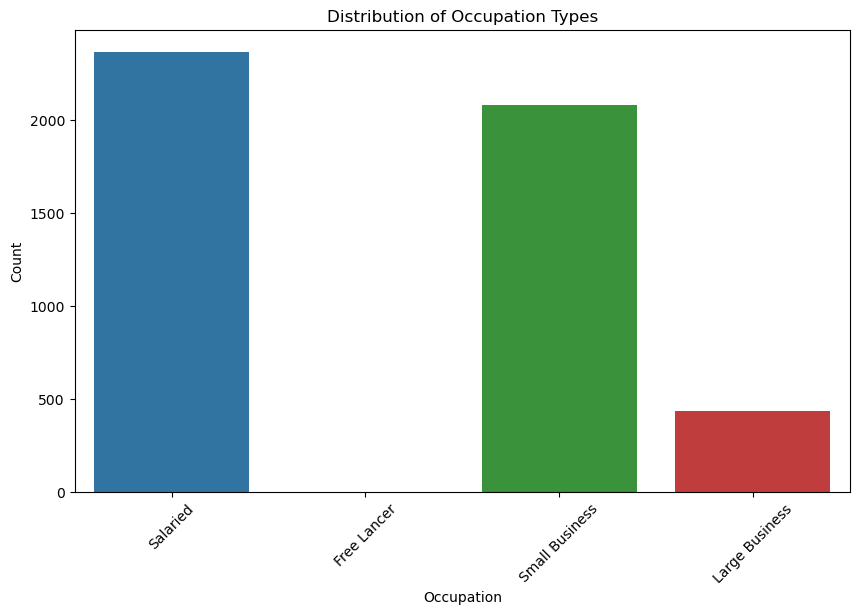

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation')
plt.title('Distribution of Occupation Types')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

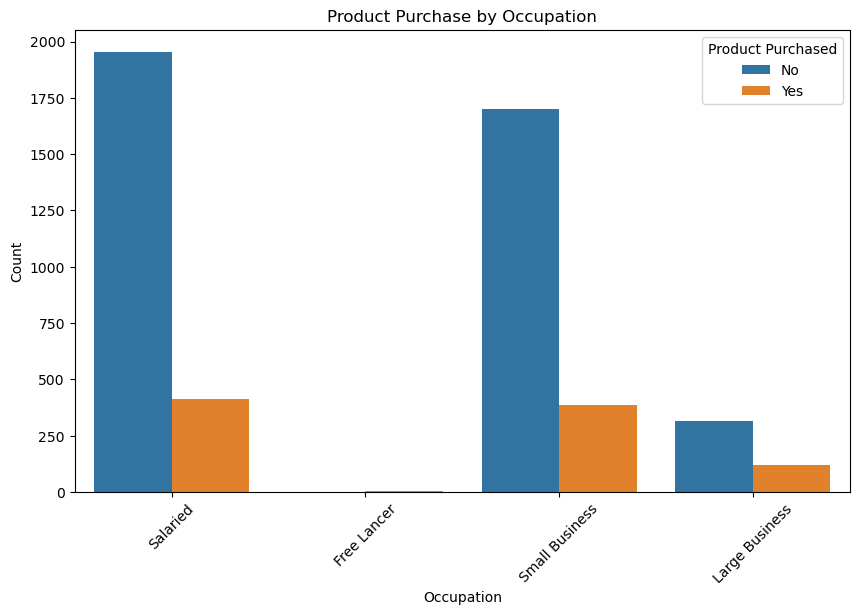

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation', hue='ProdTaken')
plt.title('Product Purchase by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

# F. Are there any gender-based preferences for the type of product pitched (ProductPitched)?

In [41]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female', regex = False)

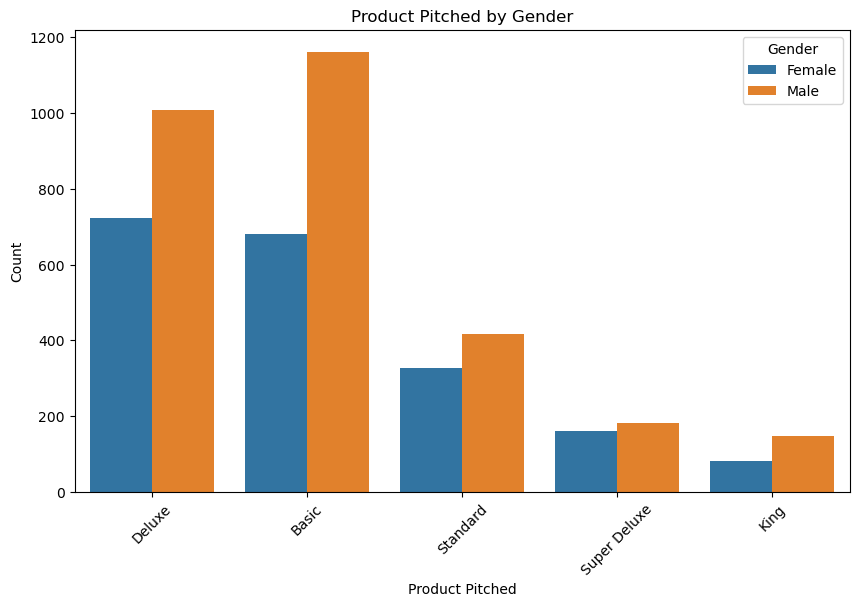

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ProductPitched', hue='Gender')
plt.title('Product Pitched by Gender')
plt.xlabel('Product Pitched')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# G. What is the relationship between the number of trips(number of trips)taken by a customer and their likelihood to purchase a new travel product?

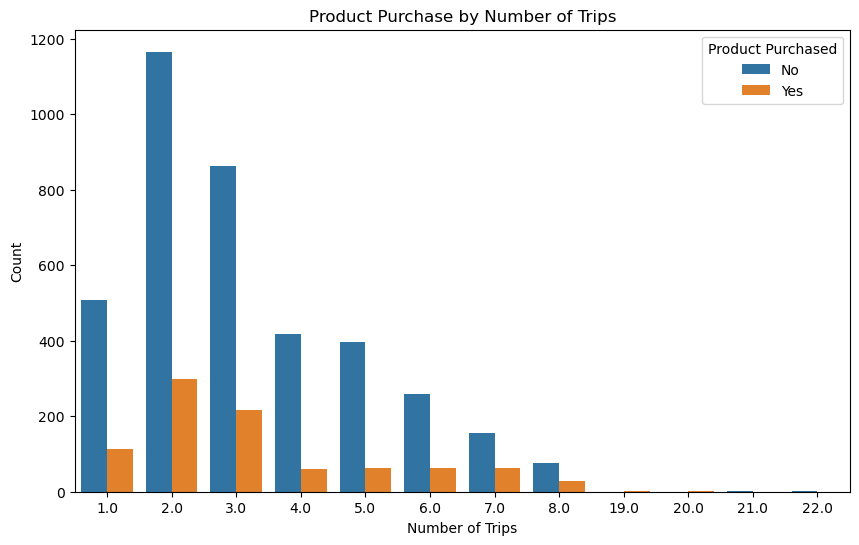

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumberOfTrips', hue='ProdTaken')
plt.title('Product Purchase by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Count')
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

# H. Does having a passport(passport)correlate with a higher number of trips taken or a higher likelihood of purchasing a travel product?

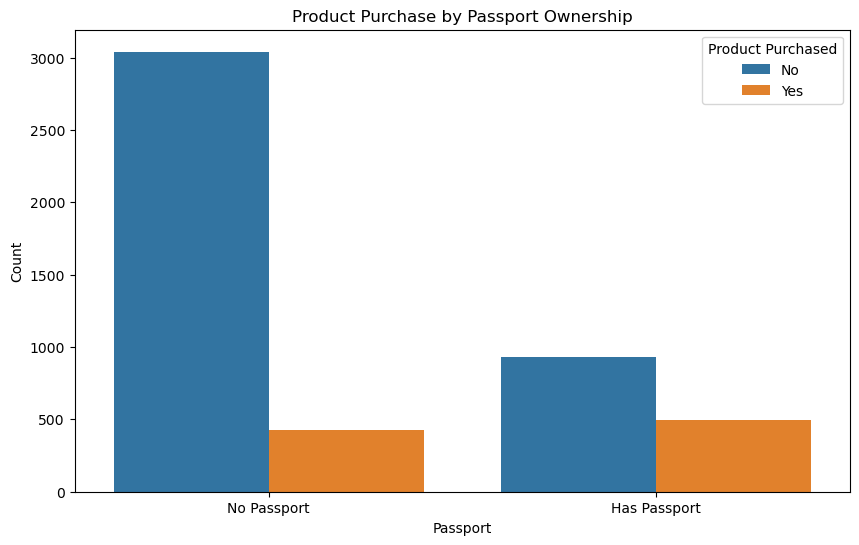

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Passport', hue='ProdTaken')
plt.title('Product Purchase by Passport Ownership')
plt.xlabel('Passport')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Passport', 'Has Passport'])
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

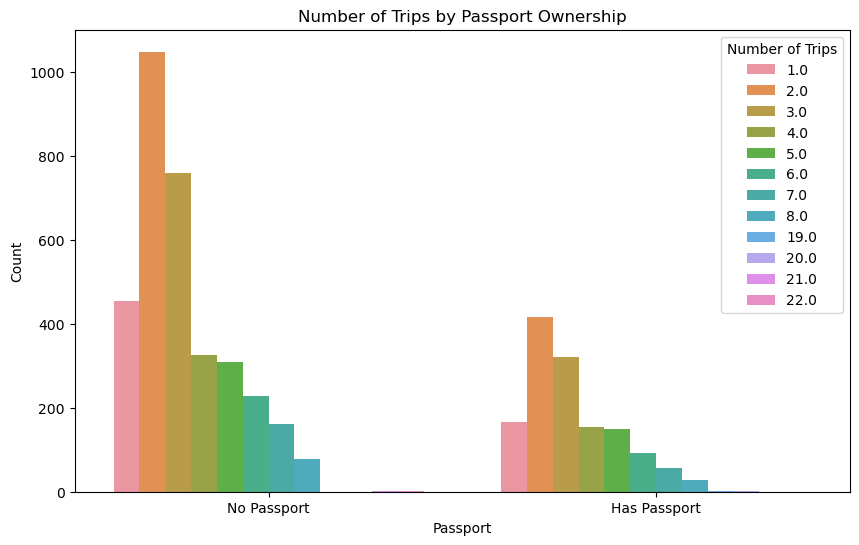

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Passport', hue='NumberOfTrips')
plt.title('Number of Trips by Passport Ownership')
plt.xlabel('Passport')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Passport', 'Has Passport'])
plt.legend(title='Number of Trips')
plt.show()

# I. How satisfied are customers with the pitch (pitch satisfaction score),and does this satisfaction influence product purchase?

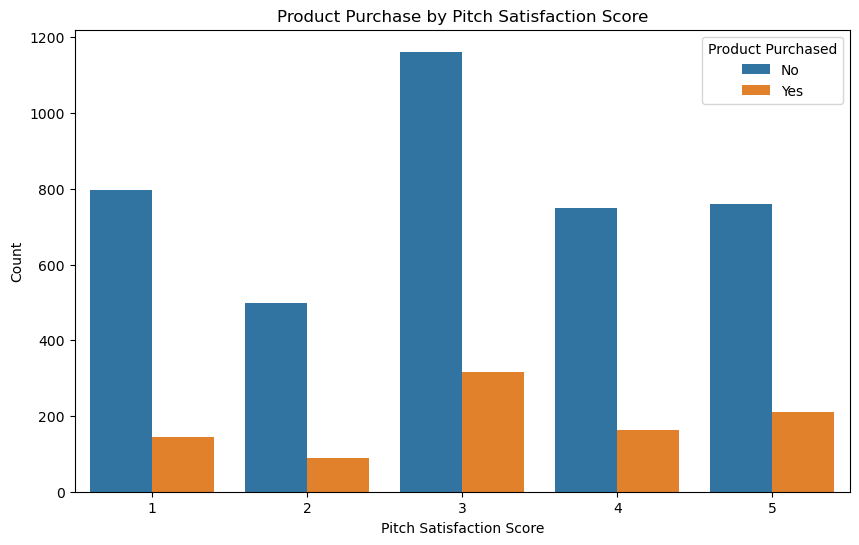

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PitchSatisfactionScore', hue='ProdTaken')
plt.title('Product Purchase by Pitch Satisfaction Score')
plt.xlabel('Pitch Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

# J. Among customers with children (number of children visiting), how does the number of children impact travel product purchases?

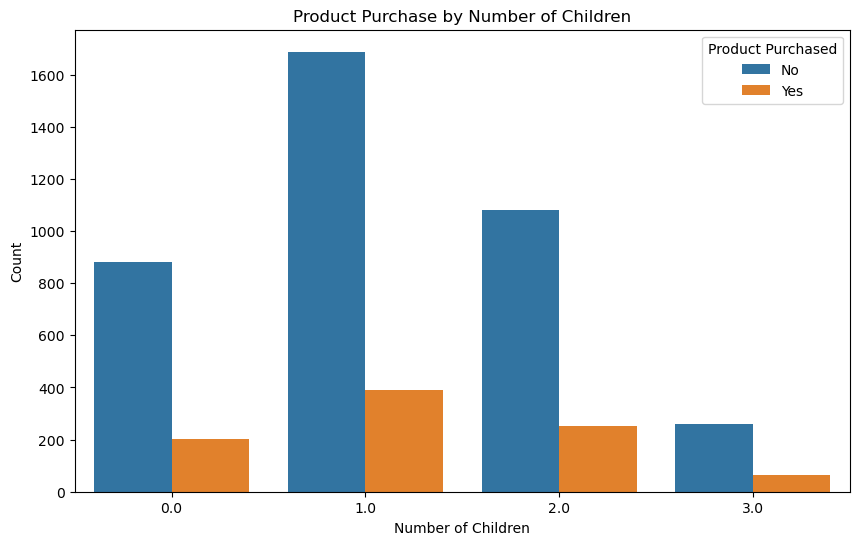

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumberOfChildrenVisiting', hue='ProdTaken')
plt.title('Product Purchase by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

# K. Gender preferences for product types: how does gender influence the preference for different types of travel products pitched (product pitched)?

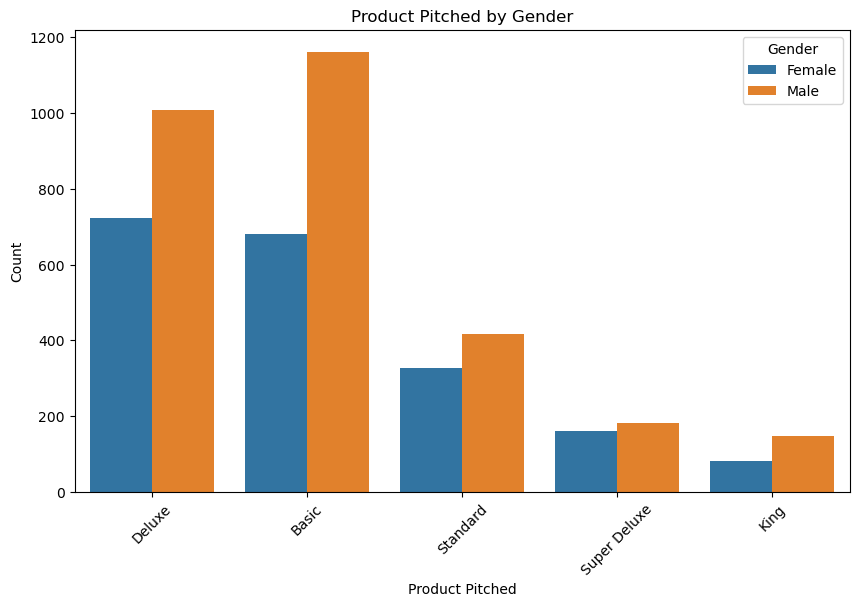

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ProductPitched', hue='Gender')
plt.title('Product Pitched by Gender')
plt.xlabel('Product Pitched')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# L. Impact of marital status on travel preferences: does marital status affect the choice of travel product, and if so, how do different marital statuses correlate with product purchases (prod taken)?

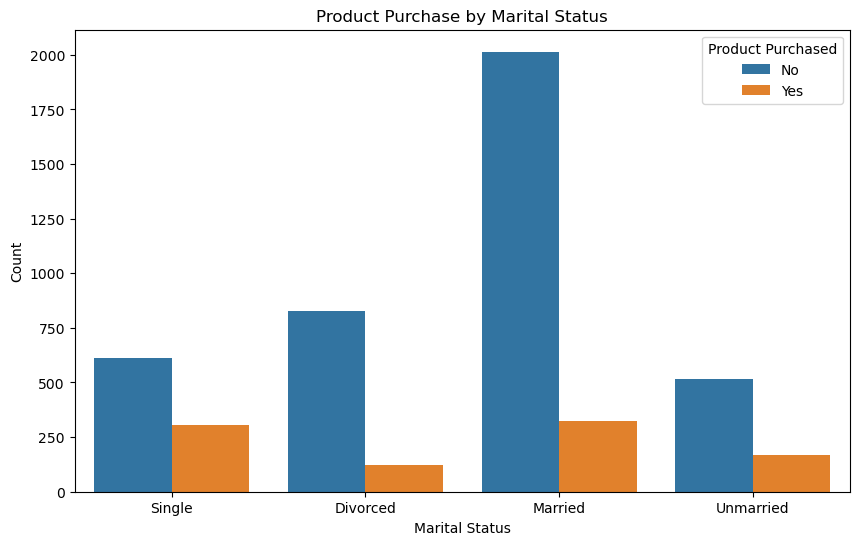

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MaritalStatus', hue='ProdTaken')
plt.title('Product Purchase by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

# M. Relationship between number of children and travel product interest: how does the number of children visiting (number of children visiting) impact the likelihood of purchasing a travel product?

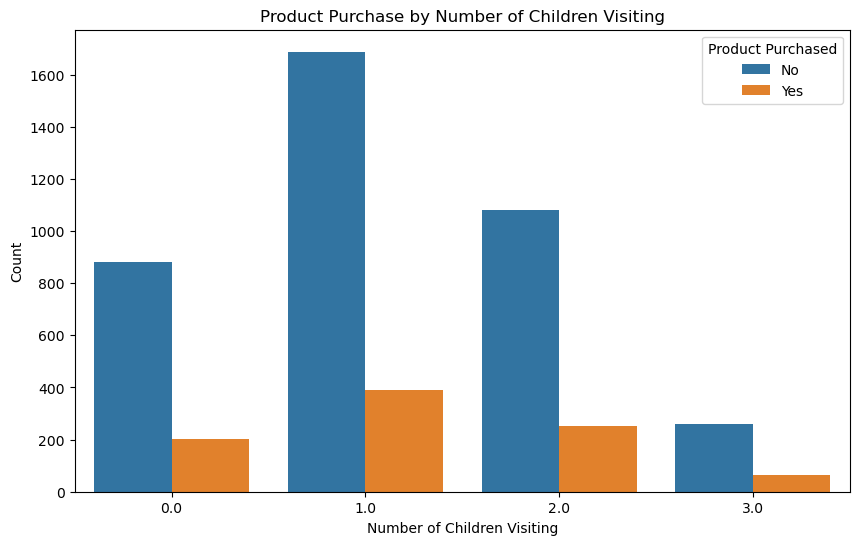

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumberOfChildrenVisiting', hue='ProdTaken')
plt.title('Product Purchase by Number of Children Visiting')
plt.xlabel('Number of Children Visiting')
plt.ylabel('Count')
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

# N. Influence of owning a car on travel decisions: is there a correlation between owning a car (own car) and the number of trips taken (number of trips) or the type of travel product purchased?

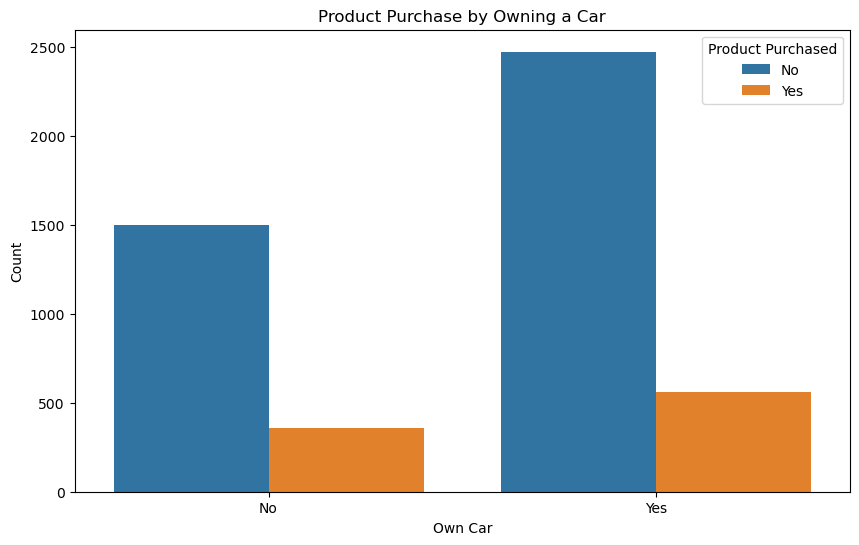

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OwnCar', hue='ProdTaken')
plt.title('Product Purchase by Owning a Car')
plt.xlabel('Own Car')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Product Purchased', labels=['No', 'Yes'])
plt.show()

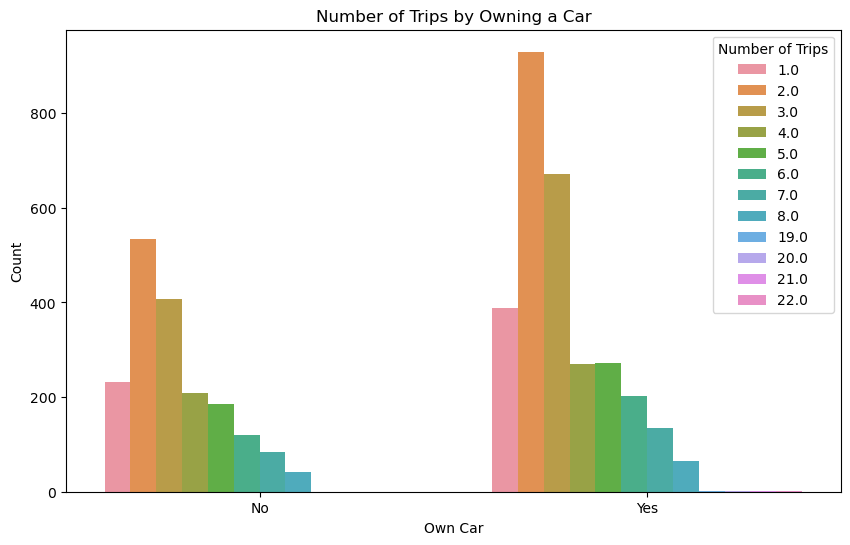

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OwnCar', hue='NumberOfTrips')
plt.title('Number of Trips by Owning a Car')
plt.xlabel('Own Car')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Number of Trips')
plt.show()

# O. Income level and product choice: how does the monthly income (monthly income) of customers influence their choice of travel products, and is there a preferred product for different income levels?

In [61]:
df["MonthlyIncome"].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [62]:
incomeBins = range(1000, 110000, 10000)

# Use cut method to categorize age into bins
df['incomeBin'] = pd.cut(df['MonthlyIncome'], bins = incomeBins)

In [63]:
df.groupby(["incomeBin", "ProductPitched"]).size().unstack()

ProductPitched,Basic,Deluxe,King,Standard,Super Deluxe
incomeBin,,,,,
"(1000, 11000]",0,1,0,0,0
"(11000, 21000]",1059,456,1,10,1
"(21000, 31000]",681,1119,1,692,89
"(31000, 41000]",13,9,228,40,252
"(41000, 51000]",0,0,0,0,0
"(51000, 61000]",0,0,0,0,0
"(61000, 71000]",0,0,0,0,0
"(71000, 81000]",0,0,0,0,0
"(81000, 91000]",0,0,0,0,0


# Thank You